In [45]:
import matplotlib.pyplot as plt
import time
from mesa.batchrunner import batch_run
import pandas as pd
import numpy as np
%matplotlib inline

from model2 import SchellingModel


#IL MODELLO, PER COME EFFETTUA LO STEP, CONSIDERA IL NEIGH ASSOLUTO => SE UN AGENTE è SOLO (NON HA NEIGH DI NESSUN TIPO) ALLORA è CONSIDERATO COME NON SODDISFATTO

TESTARE IL NEIGH RELATIVO

Now we instantiate a model instance: a 10x10 grid, with an 80% chance of an agent being placed in each cell, approximately 20% of agents set as minorities, and agents wanting at least 30% similar neighbors.

In [4]:
#["pure_random","mild_random","min_gain","max_gain"]
#neighborhood_type = "abs"/"rel"
model = SchellingModel(15, 0.7, 0.3, 0.3, "max_gain", neighborhood_type="abs", verbose = 0, skip_if_not_happy = True)
# side =10, density=0.7, minority_pc=0.3, homophily=0.3, verbose
#minority: 0 = all blue, 1 = all red
#cell type: 1 = red, 2 = blue 

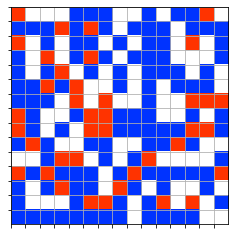

In [5]:
model.show()

We want to run the model until all the agents are happy with where they are. However, there's no guarentee that a given model instantiation will ever settle down. So let's run it for either 100 steps or until it stops on its own, whichever comes first:

In [6]:
start = time.time()
while model.running and model.schedule.steps < 200: #blu = 2, red = 1
    model.step()
end = time.time()
print("Steps before stop condition")
print(model.schedule.steps) # Show how many steps have actually run

print("time elapsed")
print(end-start)

Steps before stop condition
3
time elapsed
0.8218705654144287


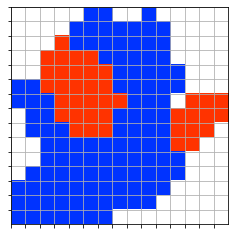

In [7]:
model.show()

In [23]:
model.schedule._agents[8].pos

(2, 2)

In [22]:
model.schedule._agents[8].segregation

0.25

In [8]:
model.schedule._agents[0].type

2

In [8]:
#for each iter, compute and store the user def fun for the whole agents set
r = model.datacollector.get_model_vars_dataframe()
r

,perc_happy,tot_seg,elapsed_step_time
0,0.640000,0.614167,0.728142
1,0.953333,0.748333,0.091679
2,1.000000,0.763333,0.001039


<AxesSubplot:>

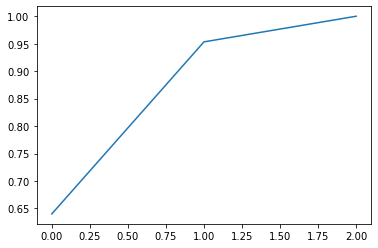

In [9]:
r['perc_happy'].plot()

<AxesSubplot:>

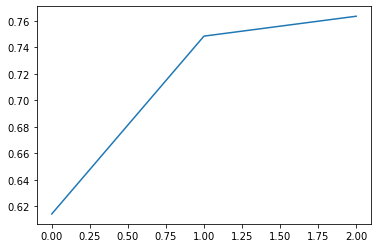

In [10]:
r['tot_seg'].plot()

<AxesSubplot:>

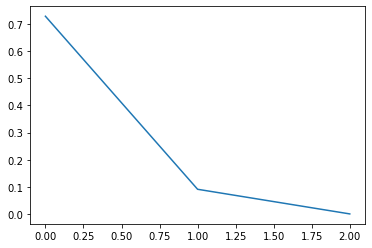

In [11]:
r['elapsed_step_time'].plot()

In [12]:
#for each iter, compute and store the user def fun for each agent
r1 = model.datacollector.get_agent_vars_dataframe()
r1

x  y  segregation
Step AgentID                    
1    0         6  7        0.375
     1        12  1        0.750
     2         0  5        0.500
     3         0  6        0.500
     4         0  9        0.375
...           .. ..          ...
3    145      13  2        1.000
     146      13  6        0.875
     147       9  3        0.875
     148       1  7        0.750
     149      11  8        1.000

[450 rows x 3 columns]

<AxesSubplot:xlabel='Step,AgentID'>

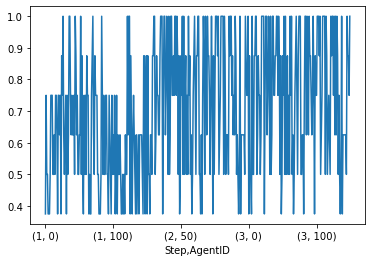

In [13]:
r1['segregation'].plot()

BATCH RUN

In [49]:
parameters = {"side": np.arange(8, 11, 1), "density": 0.7, "minority_pc": 0.3, 
              "homophily": np.arange(0.3,0.5,0.1), "relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "neighborhood_type":["abs","rel"], "skip_if_not_happy":True}

#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=2,
    data_collection_period=1,
    display_progress=True,
)

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [04:57<00:00,  6.19s/it]


In [50]:
df = pd.DataFrame(results)
df

,RunId,iteration,Step,side,density,minority_pc,homophily,relocation_policy,neighborhood_type,skip_if_not_happy,perc_happy,tot_seg,elapsed_step_time,AgentID,x,y,segregation
0,1,0,0,8,0.7,0.3,0.3,pure_random,rel,True,0.829787,0.535385,0.004603,NaN,NaN,NaN,NaN
1,1,0,1,8,0.7,0.3,0.3,pure_random,rel,True,0.914894,0.617427,0.000000,0.0,0.0,0.0,0.666667
2,1,0,1,8,0.7,0.3,0.3,pure_random,rel,True,0.914894,0.617427,0.000000,1.0,0.0,1.0,0.750000
3,1,0,1,8,0.7,0.3,0.3,pure_random,rel,True,0.914894,0.617427,0.000000,2.0,0.0,2.0,0.500000
4,1,0,1,8,0.7,0.3,0.3,pure_random,rel,True,0.914894,0.617427,0.000000,3.0,0.0,4.0,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202728,44,0,200,10,0.7,0.3,0.4,max_gain,abs,True,0.491803,0.510246,0.667386,56.0,9.0,3.0,0.500000
202729,44,0,200,10,0.7,0.3,0.4,max_gain,abs,True,0.491803,0.510246,0.667386,57.0,9.0,4.0,0.375000
202730,44,0,200,10,0.7,0.3,0.4,max_gain,abs,True,0.491803,0.510246,0.667386,58.0,9.0,6.0,0.375000
202731,44,0,200,10,0.7,0.3,0.4,max_gain,abs,True,0.491803,0.510246,0.667386,59.0,6.0,2.0,0.625000


In [57]:
df.RunId.unique()

array([ 1,  0,  3,  2,  5,  4,  7,  8,  9,  6, 11, 12, 13, 10, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 14, 27, 26, 29, 28, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 30, 43, 42, 45, 46, 47, 44],
      dtype=int64)

In [54]:
df[ (df["RunId"]==1) ]

,RunId,iteration,Step,side,density,minority_pc,homophily,relocation_policy,neighborhood_type,skip_if_not_happy,perc_happy,tot_seg,elapsed_step_time,AgentID,x,y,segregation
0,1,0,0,8,0.7,0.3,0.3,pure_random,rel,True,0.829787,0.535385,0.004603,NaN,NaN,NaN,NaN
1,1,0,1,8,0.7,0.3,0.3,pure_random,rel,True,0.914894,0.617427,0.000000,0.0,0.0,0.0,0.666667
2,1,0,1,8,0.7,0.3,0.3,pure_random,rel,True,0.914894,0.617427,0.000000,1.0,0.0,1.0,0.750000
3,1,0,1,8,0.7,0.3,0.3,pure_random,rel,True,0.914894,0.617427,0.000000,2.0,0.0,2.0,0.500000
4,1,0,1,8,0.7,0.3,0.3,pure_random,rel,True,0.914894,0.617427,0.000000,3.0,0.0,4.0,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,1,0,10,8,0.7,0.3,0.3,pure_random,rel,True,1.000000,0.732270,0.001009,42.0,7.0,2.0,0.800000
467,1,0,10,8,0.7,0.3,0.3,pure_random,rel,True,1.000000,0.732270,0.001009,43.0,3.0,4.0,0.750000
468,1,0,10,8,0.7,0.3,0.3,pure_random,rel,True,1.000000,0.732270,0.001009,44.0,7.0,4.0,0.600000
469,1,0,10,8,0.7,0.3,0.3,pure_random,rel,True,1.000000,0.732270,0.001009,45.0,7.0,5.0,0.600000


In [55]:
df_abs = df[ (df["neighborhood_type"]=="abs") ]
df_abs

,RunId,iteration,Step,side,density,minority_pc,homophily,relocation_policy,neighborhood_type,skip_if_not_happy,perc_happy,tot_seg,elapsed_step_time,AgentID,x,y,segregation
471,0,0,0,8,0.7,0.3,0.3,pure_random,abs,True,0.512195,0.317073,0.000000,NaN,NaN,NaN,NaN
472,0,0,1,8,0.7,0.3,0.3,pure_random,abs,True,0.682927,0.390244,0.000000,0.0,0.0,5.0,0.250
473,0,0,1,8,0.7,0.3,0.3,pure_random,abs,True,0.682927,0.390244,0.000000,1.0,6.0,1.0,0.250
474,0,0,1,8,0.7,0.3,0.3,pure_random,abs,True,0.682927,0.390244,0.000000,2.0,0.0,3.0,0.375
475,0,0,1,8,0.7,0.3,0.3,pure_random,abs,True,0.682927,0.390244,0.000000,3.0,0.0,4.0,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202728,44,0,200,10,0.7,0.3,0.4,max_gain,abs,True,0.491803,0.510246,0.667386,56.0,9.0,3.0,0.500
202729,44,0,200,10,0.7,0.3,0.4,max_gain,abs,True,0.491803,0.510246,0.667386,57.0,9.0,4.0,0.375
202730,44,0,200,10,0.7,0.3,0.4,max_gain,abs,True,0.491803,0.510246,0.667386,58.0,9.0,6.0,0.375
202731,44,0,200,10,0.7,0.3,0.4,max_gain,abs,True,0.491803,0.510246,0.667386,59.0,6.0,2.0,0.625


In [56]:
df_rel = df[ (df["neighborhood_type"]=="rel") & (df["RunId"]=="rel")  ]
df_rel

,RunId,iteration,Step,side,density,minority_pc,homophily,relocation_policy,neighborhood_type,skip_if_not_happy,perc_happy,tot_seg,elapsed_step_time,AgentID,x,y,segregation
0,1,0,0,8,0.7,0.3,0.3,pure_random,rel,True,0.829787,0.535385,0.004603,NaN,NaN,NaN,NaN
1,1,0,1,8,0.7,0.3,0.3,pure_random,rel,True,0.914894,0.617427,0.000000,0.0,0.0,0.0,0.666667
2,1,0,1,8,0.7,0.3,0.3,pure_random,rel,True,0.914894,0.617427,0.000000,1.0,0.0,1.0,0.750000
3,1,0,1,8,0.7,0.3,0.3,pure_random,rel,True,0.914894,0.617427,0.000000,2.0,0.0,2.0,0.500000
4,1,0,1,8,0.7,0.3,0.3,pure_random,rel,True,0.914894,0.617427,0.000000,3.0,0.0,4.0,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190527,47,0,4,10,0.7,0.3,0.4,min_gain,rel,True,1.000000,0.785958,0.000000,73.0,9.0,3.0,0.500000
190528,47,0,4,10,0.7,0.3,0.4,min_gain,rel,True,1.000000,0.785958,0.000000,74.0,1.0,4.0,0.714286
190529,47,0,4,10,0.7,0.3,0.4,min_gain,rel,True,1.000000,0.785958,0.000000,75.0,9.0,5.0,1.000000
190530,47,0,4,10,0.7,0.3,0.4,min_gain,rel,True,1.000000,0.785958,0.000000,76.0,0.0,4.0,1.000000


In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(df[ (df["RunId"]==1) & (df["RunId"]==1) ]['segregation'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss',  linestyle='dashed')

<AxesSubplot:>

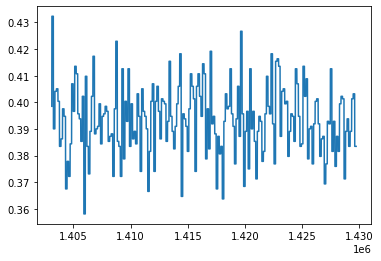

In [20]:
df[df["RunId"]==1]['tot_seg'].plot()

In [ ]:
 plt.figure(figsize=(9, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss',  linestyle='dashed')

In [40]:
model.schedule.get_agent_count()

150


The model has a DataCollector object, which checks and stores how many agents are happy at the end of each step. It can also generate a pandas DataFrame of the data it has collected:

In [7]:
model_vars = model.datacollector.get_model_vars_dataframe()

In [8]:
model_vars

,perc_happy,tot_seg_avg,num_agents_happy
0,0.500,0.406250,8
1,0.375,0.390625,6


Finally, we can plot the 'happy' series:

Total agents: 70


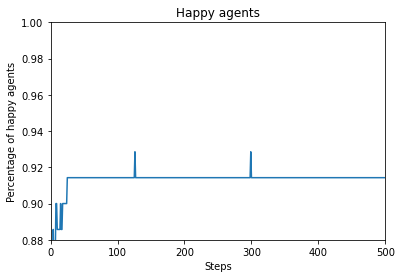

In [68]:
print("Total agents:", model.schedule.get_agent_count())


model_vars.perc_happy.plot()

plt.axis([0, 500, 0.88, 1])
plt.title("Happy agents")
plt.xlabel("Steps")
plt.ylabel("Percentage of happy agents")
plt.show()

Plot also total segregation in time

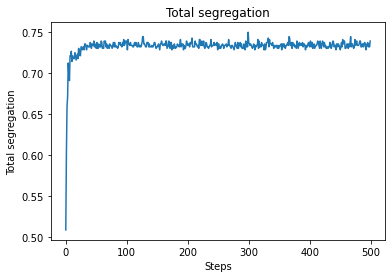

In [70]:
model_vars.tot_seg.plot()

plt.title("Total segregation")
plt.xlabel("Steps")
plt.ylabel("Total segregation")
plt.show()

For testing purposes, here is a table giving each agent's x and y values at each step.

In [9]:
agent_vars= model.datacollector.get_agent_vars_dataframe()

In [72]:
agent_vars.head()

x  y  segregation
Step AgentID                   
1    0        7  0         0.25
     1        0  3         0.50
     2        0  4         0.50
     3        0  5         0.50
     4        6  4         0.25

In [79]:
agent_vars.columns

Index(['x', 'y', 'segregation'], dtype='object')

In [82]:
agent_vars.loc[1] #accede su singoli step

,x,y,segregation
AgentID,,,
0,7,0,0.250
1,0,3,0.500
2,0,4,0.500
3,0,5,0.500
4,6,4,0.250
...,...,...,...
65,9,3,0.625
66,9,4,0.500
67,7,8,0.250


In [89]:
agent_vars.loc[1,0]

x              7.00
y              0.00
segregation    0.25
Name: (1, 0), dtype: float64

In [97]:
a = agent_vars.loc[1]
a.loc[0:3]

,x,y,segregation
AgentID,,,
0,7,0,0.25
1,0,3,0.50
2,0,4,0.50
3,0,5,0.50


Effect of Homophily on segregation
Now, we can do a parameter sweep to see how segregation changes with homophily.
First, we create a function which takes a model instance and returns what fraction of agents are segregated -- that is, have no neighbors of the opposite type.

In [14]:
import numpy as np
import pandas as pd
from mesa.batchrunner import batch_run

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [16]:
parameters = {"side": 10, "density": 0.8, "minority_pc": 0.2, 
              "homophily": np.arange(1/8,9/8,1/8)}

In [17]:
#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 10,
    max_steps=500,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [01:25<00:00,  1.07s/it]


In [18]:
df = pd.DataFrame(results)
df

,RunId,iteration,Step,side,density,minority_pc,homophily,perc_happy,tot_seg,AgentID,x,y,segregation
0,0,0,0,10,0.8,0.2,0.125,0.886076,0.441456,NaN,NaN,NaN,NaN
1,0,0,1,10,0.8,0.2,0.125,0.962025,0.468354,0.0,0.0,0.0,0.375
2,0,0,1,10,0.8,0.2,0.125,0.962025,0.468354,1.0,0.0,1.0,0.375
3,0,0,1,10,0.8,0.2,0.125,0.962025,0.468354,2.0,0.0,3.0,0.125
4,0,0,1,10,0.8,0.2,0.125,0.962025,0.468354,3.0,0.0,4.0,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388576,79,9,500,10,0.8,0.2,1.000,0.012346,0.458333,76.0,1.0,6.0,1.000
2388577,79,9,500,10,0.8,0.2,1.000,0.012346,0.458333,77.0,4.0,6.0,0.625
2388578,79,9,500,10,0.8,0.2,1.000,0.012346,0.458333,78.0,6.0,7.0,0.250
2388579,79,9,500,10,0.8,0.2,1.000,0.012346,0.458333,79.0,5.0,5.0,0.375


For each value of homophily, we look at final total happiness

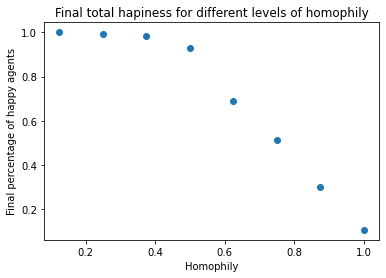

In [19]:
hom_iter = df.groupby(["homophily","iteration"]).max()[["perc_happy"]]
mean_happy = hom_iter.groupby("homophily").mean()["perc_happy"]

plt.scatter(np.arange(1/8,9/8,1/8),mean_happy)

plt.title("Final total hapiness for different levels of homophily")
plt.xlabel("Homophily")
plt.ylabel("Final percentage of happy agents")
plt.show()

We can look at no. of steps

In [20]:
df.groupby(["homophily"]).max()[["Step"]]

,Step
homophily,
0.125,6
0.250,500
0.375,500
0.500,500
0.625,500
0.750,500
0.875,500
1.000,500


We plot the mean (on 10 interations) of final segregation for evert homophily level

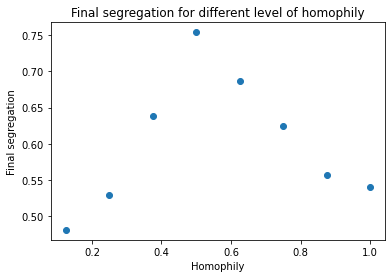

In [21]:
hom_iter = df.groupby(["homophily","iteration"]).max()[["tot_seg"]]
tot_seg = hom_iter.groupby("homophily").mean()["tot_seg"]

plt.scatter(np.arange(1/8,9/8,1/8),tot_seg)


plt.title("Final segregation for different level of homophily")
plt.xlabel("Homophily")
plt.ylabel("Final segregation")
plt.show()

We now have a look to segregation over steps for the highest level of homophily

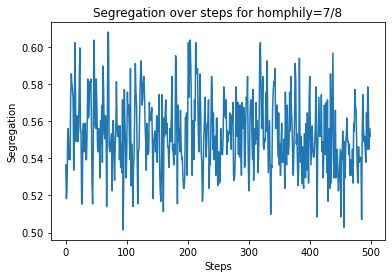

In [23]:
plt.plot(df[(df["AgentID"]==1) & (df["homophily"]==7/8) & (df["iteration"]==0)].reset_index()["tot_seg"])

plt.title("Segregation over steps for homphily=7/8")
plt.xlabel("Steps")
plt.ylabel("Segregation")
plt.show()

Now, we can do a parameter sweep to see how segregation changes with minority_pc

In [24]:
parameters = {"side": 10, "density": 0.8, "minority_pc": [.1,.2, .3,.4, .5], 
              "homophily": 0.3}

results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 10,
    max_steps=500,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:22<00:00,  2.22it/s]


In [25]:
df = pd.DataFrame(results)

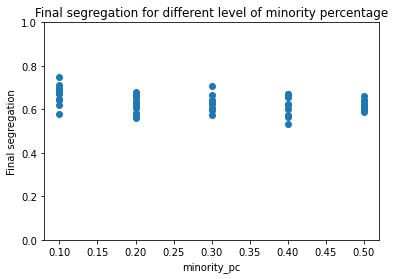

In [26]:
min_iter = df.groupby(["minority_pc","iteration"]).max()[["tot_seg"]]
min_iter
plt.scatter(np.repeat([.1,.2,.3,.4,.5],10),min_iter)


plt.title("Final segregation for different level of minority percentage")
plt.xlabel("minority_pc")
plt.ylabel("Final segregation")
plt.ylim(0, 1)

plt.show()

In [27]:
df.groupby(["minority_pc"]).max()[["Step"]]

,Step
minority_pc,
0.1,500
0.2,500
0.3,500
0.4,500
0.5,500


In [29]:
df.head()

,RunId,iteration,Step,side,density,minority_pc,homophily,perc_happy,tot_seg,AgentID,x,y,segregation
0,0,0,0,10,0.8,0.1,0.3,0.915663,0.671687,NaN,NaN,NaN,NaN
1,0,0,1,10,0.8,0.1,0.3,0.939759,0.677711,0.0,9.0,1.0,0.250
2,0,0,1,10,0.8,0.1,0.3,0.939759,0.677711,1.0,0.0,1.0,0.500
3,0,0,1,10,0.8,0.1,0.3,0.939759,0.677711,2.0,0.0,2.0,0.625
4,0,0,1,10,0.8,0.1,0.3,0.939759,0.677711,3.0,0.0,3.0,0.500


In [9]:
import pandas as pd
import numpy as np
d = pd.DataFrame(0, index=np.arange(10), columns=['x','y','happiness'])
d

,x,y,happiness
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [10]:
d.loc[(d["x"] == 0) & (d["y"] == 0), "happiness"] = 52
d

,x,y,happiness
0,0,0,52
1,0,0,52
2,0,0,52
3,0,0,52
4,0,0,52
5,0,0,52
6,0,0,52
7,0,0,52
8,0,0,52
9,0,0,52


In [11]:
d.iloc[0]['happiness'] = 1
d

,x,y,happiness
0,0,0,1
1,0,0,52
2,0,0,52
3,0,0,52
4,0,0,52
5,0,0,52
6,0,0,52
7,0,0,52
8,0,0,52
9,0,0,52


In [12]:
d.sort_values(by="happiness", inplace = True, ascending = False)
d.reset_index(inplace = True)
d

,index,x,y,happiness
0,1,0,0,52
1,2,0,0,52
2,3,0,0,52
3,4,0,0,52
4,5,0,0,52
5,6,0,0,52
6,7,0,0,52
7,8,0,0,52
8,9,0,0,52
9,0,0,0,1


In [13]:
d_happy = d[d["happiness"]>53]
d_happy.reset_index(inplace=True)
d_happy

,level_0,index,x,y,happiness


In [18]:
d_happy.empty

True